In [1]:
print("hello")

hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns


In [4]:
data = pd.read_csv('Salary_dataset.csv')

In [5]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
#dependent and independent vriable 
x = data[['Unnamed: 0' , 'YearsExperience']]

y = data['Salary']

In [7]:
x

,Unnamed: 0,YearsExperience
0,0,1.2
1,1,1.4
2,2,1.6
3,3,2.1
4,4,2.3
5,5,3.0
6,6,3.1
7,7,3.3
8,8,3.3
9,9,3.8


In [8]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

<Axes: >

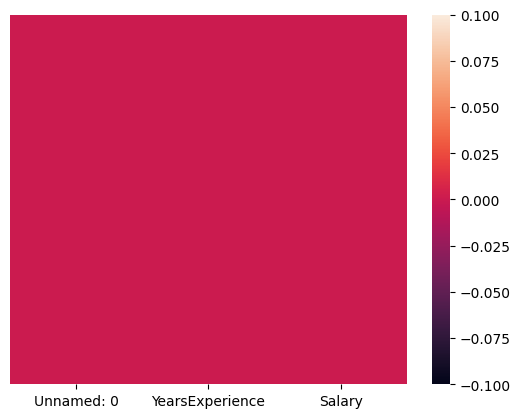

In [13]:
#find outlers

sns.heatmap(data.isnull() , yticklabels=False)

<Axes: >

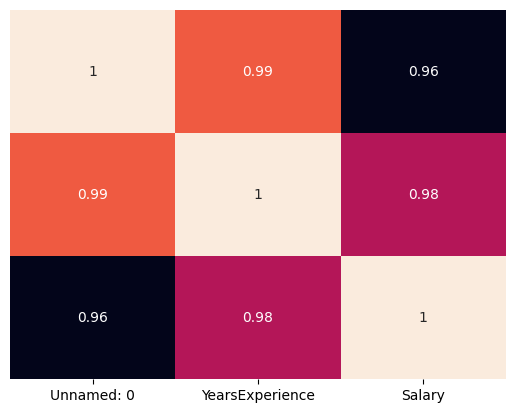

In [14]:
# Try to Find realationship Betweeen dependent and independent variable

sns.heatmap(data.corr() , yticklabels=False , annot=True , cbar=False)

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [16]:
X_train

,Unnamed: 0,YearsExperience
4,4,2.3
16,16,5.2
5,5,3.0
13,13,4.2
11,11,4.1
22,22,8.0
1,1,1.4
2,2,1.6
25,25,9.1
3,3,2.1


In [17]:
y_train

4      39892.0
16     66030.0
5      56643.0
13     57082.0
11     55795.0
22    101303.0
1      46206.0
2      37732.0
25    105583.0
3      43526.0
21     98274.0
26    116970.0
18     81364.0
29    121873.0
20     91739.0
7      54446.0
10     63219.0
14     61112.0
19     93941.0
6      60151.0
Name: Salary, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler  

StandardScaler()

In [19]:
scaler.fit(X_train , y_train)

StandardScaler()

In [21]:
scaler.transform(X_test)

array([[ 1.58206423,  1.71840777],
       [ 0.16529029, -0.04502378],
       [ 1.10980625,  1.19313029],
       [ 0.40141928,  0.1050555 ],
       [-0.66116117, -0.68286073],
       [-0.54309668, -0.49526163],
       [ 1.70012873,  1.98104652],
       [ 1.22787075,  1.38072939],
       [-0.18890319, -0.38270217],
       [-1.60567713, -1.47077696]])

In [32]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
liner_reg = LinearRegression()
liner_reg

LinearRegression()

In [33]:
liner_reg.fit(X_train , y_train)

LinearRegression()

In [34]:
mse = cross_val_score(liner_reg , X_train , y_train ,  scoring='neg_mean_squared_error'  , cv=5)

In [35]:
np.mean(mse)

np.float64(-39413405.51698518)

In [36]:
x_pred = liner_reg.predict(X_test)

In [37]:
x_pred

array([116410.1781502 ,  70397.92194323, 102971.56854528,  73699.37031037,
        55424.99622293,  60493.57684182, 123757.32972598, 108040.14916417,
        62027.8929572 ,  36522.77536217])

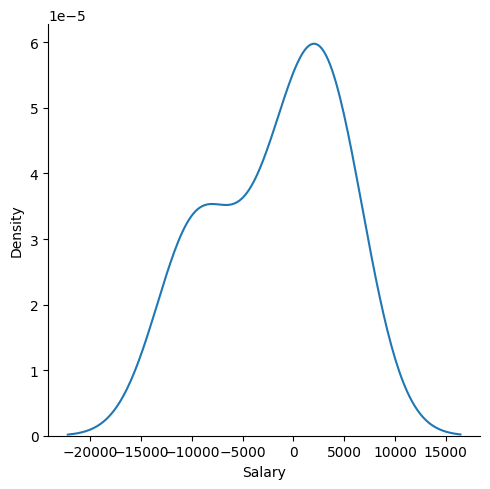

In [39]:
sns.displot(x_pred-y_test , kind='kde')

In [40]:
from sklearn.metrics import r2_score

In [42]:
score = r2_score(x_pred , y_test)

In [43]:
score

0.9548223227987808

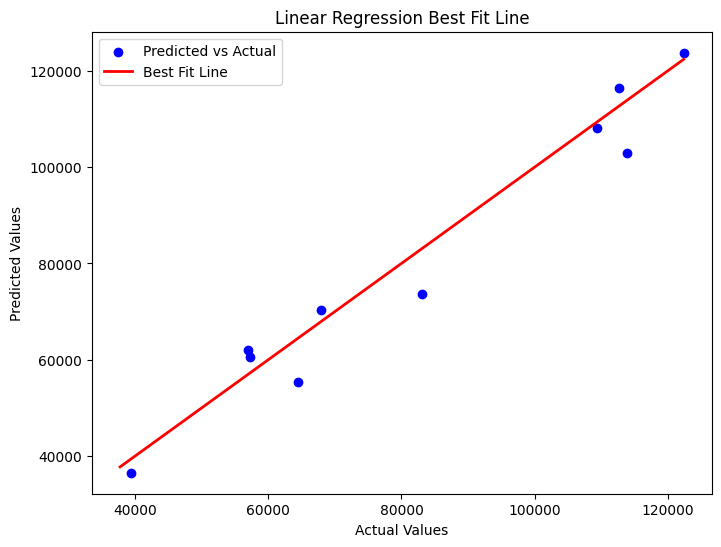

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(y_test , x_pred , color = 'Blue' , label='Predicted vs Actual')
plt.plot([y.min() , y.max()] , [y.min() , y.max()], color = 'red' , linewidth=2 , label = 'Best Fit Line')
plt.title('Linear Regression Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Ridge

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Ridge_reg = Ridge()
Ridge_reg

Ridge()

In [50]:
parametrs = {'alpha' : [1,2 ,100 , 150 , 33 , 20154]}
grid = GridSearchCV(Ridge_reg , parametrs , scoring='neg_mean_squared_error' , cv=5)
grid.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 100, 150, 33, 20154]},
             scoring='neg_mean_squared_error')

In [51]:
print(grid.best_params_)

{'alpha': 1}


In [52]:
print(grid.best_score_)

-39409333.8216787


In [54]:
search = grid.predict(X_test)

In [55]:
search

array([115450.2118832 ,  71653.43243161, 102372.54271549,  75454.00384641,
        55613.16931075,  60251.71818721, 121914.26953904, 107011.09159195,
        63214.31214035,  35847.11170312])

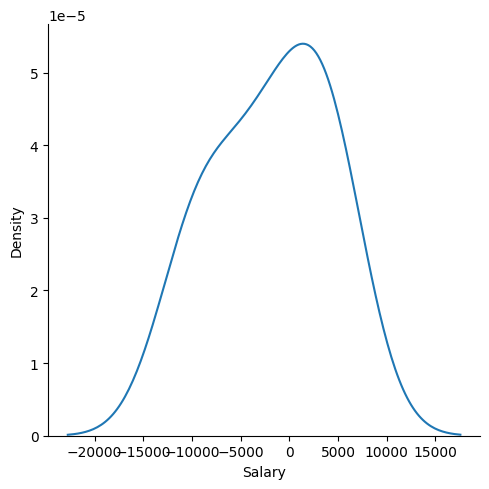

In [57]:
sns.displot(search-y_test , kind='kde')

lasso

In [64]:
from sklearn.linear_model import Lasso
lass_o = Lasso()
lass_o

Lasso()

In [65]:
lass_o.fit(X_train , y_train)

Lasso()

In [66]:
parametrs = {'alpha':[1,2,34,45,234,45,563,45345,354]}
search_cv = GridSearchCV(lass_o , parametrs ,scoring='neg_mean_squared_error' , cv = 5 )
search_cv.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 34, 45, 234, 45, 563, 45345, 354]},
             scoring='neg_mean_squared_error')